# Linear Programming (LP)

## Diet Problem

- The Office of Nutrition Inspection (ONI) of the EU recently found out that dishes served at the dining and beverage facility "Bullneck's", such as herring, hot dogs, and house-style hamburgers do not comport with the new nutritional
regulations, and its report mentioned explicitly the lack of vitamins A and C and dietary fiber.
- The owner and operator of the aforementioned facility is attempting to rectify these shortcomings by augmenting the menu with vegetable side dishes, which he intends to create from white cabbage, carrots, and a stockpile of pickled cucumbers discovered in the cellar.
- The following table summarizes the numerical data: the prescribed amount of the vitamins and fiber per dish, their content in the foods, and the unit prices of the foods. 
- At what minimum additional price per dish can the requirements of the ONI be satisfied ?
- Answer: $0.07$ dollar with $(9.526, 38.265, 294.89)$g.

|                      |  Carrot, Raw |  White Cabbage, Raw  |  Cucumber, Pickled |  Required per Dish |
| -------------------- | :----------: | :------------------: | :----------------: | :----------------: | 
| Vitamin A (mg/kg)    |      35      |         0.5          |         0.5        |        0.5 mg      | 
| Vitamin C (mg/kg)    |      60      |         300          |          10        |        15 mg       | 
| Dietary Fiber (g/kg) |      30      |          20          |          10        |         4 g        |
| Price ($ / kg)       |     0.75     |         0.5          |         0.15       |         ---        |

In [ ]:
import numpy as np
import cvxpy as cp

## Flow in a Network

- An administrator of a computer network purchases a new computer with an improved sound system.
- He wants to transfer his music collection from an old computer to the new one, using a local network shown as
  <img src="note/fig/flow_orig.png" width="600">
- The numbers near each data link specify the maximum transfer rate of that link (in Mbit/s, say).
- Each link can transfer data in either direction, but not in both directions simultaneously.
- What is the maximum transfer rate from computer $o$ (old) to computer $n$ (new)? Solution: 4
  <!--
  <img src="note/fig/flow_sol.png" width="550">
  -->

In [ ]:
import cvxpy as cp

ind = ['oa', 'ob', 'oc', 'ab', 'ad', 'be', 'cd', 'ce', 'dn', 'en']         
x = cp.Variable(len(ind), integer=True)
prob = cp.Problem(cp.Maximize(x[0] + x[1] + x[2]), 
                  [x[0] >= -3, x[0] <= 3,
                   x[1] >= -1, x[1] <= 1,
                   x[2] >= -1, x[2] <= 1,
                   x[3] >= -1, x[3] <= 1,
                   x[4] >= -1, x[4] <= 1,
                   x[5] >= -3, x[5] <= 3,
                   x[6] >= -4, x[6] <= 4,
                   x[7] >= -4, x[7] <= 4,
                   x[8] >= -4, x[8] <= 4,
                   x[9] >= -1, x[9] <= 1,
                   x[0] == x[3] + x[4],
                   x[1] + x[3] == x[5],
                   x[2] == x[6] + x[7],
                   x[4] + x[6] == x[8],
                   x[5] + x[7] == x[9]])
prob.solve()
print(prob.value)
print([(ind[i], v) for i, v in enumerate(x.value)])

# Mixed Integer Linear Programming (MILP)

## Fire Station Covering problem

- There are 16 districts arranged in the image below.
- Any district either contains a fire station, or neighbors a district that constains a fire station.
- Th image shows an example set of districts and a placement of locations of fire stations.

<img src="note/fig/fire-station-covering.png" width="300">

- The goal: minimize the number of fire stations needed.

In [ ]:
import numpy as np
import cvxpy as cp

# setup data
covers = {
    1: [1, 2, 4, 5],
    2: [1, 2, 3, 5, 6],
    3: [2, 3, 6, 7],
    4: [1, 4, 5, 8, 10, 11],
    5: [1, 2, 4, 5, 6, 8],
    6: [2, 3, 5, 6, 7, 8, 9],
    7: [3, 6, 7, 9, 13],
    8: [4, 5, 6, 7, 8, 9, 10, 11, 12],
    9: [6, 8, 9, 11, 12, 13],
    10: [4, 10, 11, 14],
    11: [4, 8, 9, 10, 11, 12, 14, 15],
    12: [8, 9, 11, 12, 13, 14, 15, 16],
    13: [7, 9, 12, 13, 15, 16],
    14: [10, 11, 12, 14, 15],
    15: [11, 12, 13, 14, 15, 16],
    16: [12, 13, 15, 16],
}

assign = cp.Variable(len(covers), boolean=True)
prob = cp.Problem(cp.Minimize(cp.sum(assign)), 
                  [cp.sum([assign[j - 1] for j in covers[i]]) >= 1 for i in covers.keys()])
prob.solve()
print(assign.value)

## A Media Selection Problem

<!--
  https://download.aimms.com/aimms/download/manuals/AIMMS3OM_MediaSelection.pdf
-->

- Consider a company which wants to set up an advertising campaign in preparation for the introduction of a new product.
- Several types of audiences have been identified as target audiences for the new product.
- There is a selection of media available to reach the various targets.
- However, there is no medium that will reach all audiences; consequently, several media need to be selected at the same time in order to cover all targets.
- The goal: to find a media selection which covers all types of target with minimal costs. 

|                  |  Type-1  |  Type-2  |  Type-3  |  Type-4  |  Type-5  |  Type-6  |  Costs  |
| ---------------- | :------: | :------: | :------: | :------: | :------: | :------: | :------:|
| Glossy Magazine  |    x     |          |          |    x     |          |          |  20,000 |
| TV Late Night    |          |    x     |    x     |          |          |          |  50,000 |
| TV Prime Time    |          |    x     |          |          |          |     x    |  60,000 |
| Billboard Train  |    x     |          |          |          |          |     x    |  45,000 |
| Billboard Bus    |          |          |    x     |          |          |          |  30,000 |
| National Paper   |          |          |          |    x     |          |     x    |  55,000 |
| Financial Paper  |          |    x     |          |          |     x    |          |  60,000 |
| Regional Paper   |    x     |          |          |          |     x    |          |  52,500 |

### Plain Solution

In [ ]:
import numpy as np
import cvxpy as cp

covers = np.array([
    [1, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 0],
    [1, 0, 0, 0, 1, 0],
])

costs = np.array([20000, 50000, 60000, 45000, 30000, 55000, 60000, 52500])
assign = cp.Variable(8, boolean=True)
constraints = [assign @ covers >= 1]

prob = cp.Problem(cp.Minimize(assign @ costs), constraints)
prob.solve()
print(prob.value, assign.value)

### Adding Logical Conditions

- Suppose the marketing manager of the company decides that the campaign should, in all cases, incorporate some TV commercials: 

In [ ]:
assign = cp.Variable(8, boolean=True)
constraints = [assign @ covers >= 1]
constraints.append(assign[1] + assign[2] >= 1)

prob = cp.Problem(cp.Minimize(assign @ costs), constraints)
prob.solve()
print(prob.value, assign.value)

- If at least one of the billboard possibilities is selected, then at least one of the possibilities for TV commercials must be selected:

In [ ]:
assign = cp.Variable(8, boolean=True)
constraints = [assign @ covers >= 1]
constraints.extend([assign[1] + assign[2] >= assign[3],
                    assign[1] + assign[2] >= assign[4]])

prob = cp.Problem(cp.Minimize(assign @ costs), constraints)
prob.solve()
print(prob.value, assign.value)

- If at least one of the billboard possibilities is selected, then at least one of the possibilities for TV commercials must be selected, and if at least one of the possibilities for TV commercials is selected, then at least one of the billboard possibilities must be selected:

In [ ]:
assign = cp.Variable(8, boolean=True)
constraints = [assign @ covers >= 1]
constraints.extend([assign[1] + assign[2] >= assign[3],
                    assign[1] + assign[2] >= assign[4],
                    assign[3] + assign[4] >= assign[1],
                    assign[3] + assign[4] >= assign[2],
                   ])

prob = cp.Problem(cp.Minimize(assign @ costs), constraints)
prob.solve()
print(prob.value, assign.value)

- In addtion, if TV commercials at prime time are selected then no billboards should be selected:

In [ ]:
assign = cp.Variable(8, boolean=True)
constraints = [assign @ covers >= 1]
constraints.extend([assign[1] + assign[2] >= assign[3],
                    assign[1] + assign[2] >= assign[4],
                    assign[3] + assign[4] >= assign[1],
                    assign[3] + assign[4] >= assign[2],
                    assign[3] + assign[4] <= 2 * (1 - assign[2]),
                   ])

prob = cp.Problem(cp.Minimize(assign @ costs), constraints)
prob.solve()
print(prob.value, assign.value)

## Binary Variables

Binary variables allow one to model all sorts of logical conditions as linear constraints. Let $x$, $y$ be binary variables.

## Logical NOT
Let $z = \text{not}(x)$

$$z = 1-x$$

## Logical OR
Let $z = x \text{ or } y$
\begin{align*}
  z &\geqslant x \\
  z &\geqslant y \\
  z &\leqslant x+y
\end{align*}

- If $x$ and $y$ are both 0, then $z$ must be 0 by $z\leqslant x + y$
- If either $x$ or $y$ is 1 then $z$ must be 1 by $z\geqslant x$, $z\geqslant y$
- If $x$ and $y$ are both 1, then $z\geqslant x$, $z\geqslant y$ hold and $z\leqslant x + y$ just states that $z \leqslant 2$ which is always true
  - This new variable is effectively the larger of $x$ and $y$
  - With negation and or, we have all we need to be [functionally complete](https://en.wikipedia.org/wiki/Functional_completeness)

## Logical AND
Let $z = x \text{ and } y$
\begin{align*}
  z &\leqslant x \\
  z &\leqslant y \\
  z &\geqslant x+y - 1
\end{align*}

## Logical XOR, i.e. $x$ or $y$, but not both
$$x+y \leqslant 1$$

## Implication, i.e. if $x$ then $y$, i.e. $x \implies y$

If $x$ is true, then $y$ must be true, and if $x$ is false, $y$ can be anything. This is satisfied by $$y \geqslant x$$

## Binary Variables Multiplication: Special Cases

### Case 1: $z = b\cdot x$ where $b$ is binary and $x$ is continuous

let $x \in [A,B]$ and $z$ a continuous variable with the same bounds as $x$, then form

\begin{align*}
  bA &\leqslant z \leqslant bB \\
  (1-b)A &\leqslant x-z \leqslant (1-b)B
\end{align*}

- The first condition essentially turns off $z$ if $b$ is false
- The second condition places a bound on how far away $x$ can be from $z$
  - If $b=1$ then this bound tightens to 0

### Case 2: $z = b_1 \cdot b_2$ where $b_1$, $b_2$ are binary

\begin{align*}
  z &\leqslant b_1 \\
  z &\leqslant b_2 \\
  z &\geqslant b_1 + b_2 -1
\end{align*}

- The product of two binary variables is the same as a logical AND

## Big M Method

- If there are two constraints $F(x)\geqslant 0$, $G(x)\geqslant 0$, and we want to enforce only one of them depending on the binary variable $b$, i.e. if $b=1$ then $F(x) \geqslant 0$; if $b=0$ then $G(x) \geqslant 0$
- Place a bound on both $F$ and $G$, i.e. set $M$ such that $|F| \leqslant M$ and $|G| \leqslant M$ 
- Then form
  \begin{align*}
    F(x) &\geqslant -M\cdot(1-b) \\
    G(x) &\geqslant -M\cdot b
  \end{align*}
- If $\geqslant$, then $-M$; if $\leqslant$, then $+M$

### Examples
- $ x \geqslant 10\quad\text{or}\quad x \leqslant 20$
  - Assume for the moment that $|x| \leqslant 100$ so make $M=1000$
  - This becomes
    \begin{align*}
      x &\geqslant 10 - M\cdot(1-b) \\
      x &\leqslant 20 + M\cdot b 
    \end{align*}
- $x + 10\,y \leqslant 15 \quad \text{or} \quad 3x - 8y \geqslant 9$
  - This becomes
    \begin{align*}
      x + 10\,y &\leqslant 15 + M\cdot(1-b) \\
      3x - 8y &\geqslant 9 - M\cdot b
    \end{align*}

## Disjunctions

- Suppose the constraint is $A \leqslant x \leqslant B$ or $C \leqslant x \leqslant D$
- Introduce binary $b$ which will select the interval $x$ is in:
  \begin{align*}
    b = \begin{cases} 0 &\text{if}\; A \leqslant x \leqslant B \\
                      1 &\text{if}\; C \leqslant x \leqslant D
        \end{cases}
  \end{align*}

- The constraint becomes $$ A + (C-A)b \leqslant x \leqslant B + (D- B)b$$

## Assignment Problem

- The table shows the cost of performing each of four jobs by each of four employees:


  |             |  Job-1  |  Job-2  |  Job-3  |  Job-4  |
  | ----------- | :-----: | :-----: | :-----: | :-----: |
  | Employee-1  |    1    |    2    |    1    |    9    |
  | Employee-2  |    4    |    5    |    2    |    2    |
  | Employee-3  |    7    |    3    |    9    |    3    |
  | Employee-4  |    2    |    3    |    5    |    1    |

- The goal: develop a set of job assignments that will minimize the total cost of getting all 4 jobs done and every employee will be assigned to exactly one job. 

<!--
- Note: Use `pip install cylp` to install the `cbc` mixed-integer programming engine.
-->

In [ ]:
import numpy as np
import cvxpy as cp

assign = cp.Variable((4, 4), boolean=True)
cost = np.array([[1, 2, 1, 9], [4, 5, 2, 2], [7, 3, 9, 3], [2, 3, 5, 1]])
p = cp.Problem(cp.Minimize(cp.sum(cp.multiply(assign, cost))),
              [cp.sum(assign, 0) == np.ones(4, dtype=np.int8), 
               cp.sum(assign, 1) == np.ones(4, dtype=np.int8)])
p.solve()
print(assign.value)
print(p.value)

## An Elementary Employee Scheduling

A hospital supervisor needs to create a schedule for four nurses over a three-day period subject to
- Each day is divided into three 8-hour shifts.
- Every day, each shift is assigned to a single nurse, and no nurse works more than one shift.
- Each nurse is assigned to at least two shifts during the three-day period.

Find a feasible schedule that satisfies the constraints.

In [ ]:
import cvxpy as cp

assign = cp.Variable((4, 9), boolean=True)
constraints = [cp.sum(assign, 0) == 1, 
               cp.sum(assign, 1) >= 2,]
for i in range(4):
    constraints.extend([cp.sum(assign[i, (3 * j):(3 * j + 3)]) <= 1 for j in range(3)])
prob = cp.Problem(cp.Maximize(0), constraints)
prob.solve()
print(assign.value)

## Dinner Seating Arrangement

- Consider organizing a wedding dinner at which the objective is that the guests from different families mingle with each other. 
- One of the ways to do so is to seat people at the tables in such a way that no more people than a given threshold $k$ from the same family take a seat at the same table. 
- Problem data: for each family $f$ we need to know the number of its members $m_f$, and for each table $t$ we need to know its capacity $c_t$.
- Use variable $x_{ft}$ for the number of persons from family $f$ to be seated at table $t$  If we do not care about the specific people, but only about the number of people from a given family.
- By setting the objective function to be constant, say $0$, means that we do not differentiate between the various feasible solutions. 
- The mathematical formulation of this seating problem is
  \begin{align*}
    \min_{x_{ft}} \quad & 0 \\
    \text{s.t.} \quad & \sum\limits_{f} x_{ft} \leqslant c_t & \forall \, t \in T \\
    & \sum\limits_{t} x_{ft} = m_f & \forall \, f \in F \\
    & 0 \leqslant x_{ft} \leqslant k.
  \end{align*}
- The two constraints ensure that 
  - for each table the seating capacity is not exceeded
  - each family is fully seated and that the number of elements of each family at each table does not exceed $k$
- Consider and solve the problem with family sizes $m = (6,8,2,9,13,1)$, table capacities $c = (8,8,10,4,9)$, and threshold $k=4$.   

In [ ]:
import numpy as np
import cvxpy as cp

m = [6, 8, 2, 9, 13, 1]
c = [8, 8, 10, 4, 9]
k = 4

assign = cp.Variable((len(m), len(c)), integer=True)
constraints = [
    cp.sum(assign, 0) <= np.array(c, dtype=np.int8),
    cp.sum(assign, 1) == np.array(m, dtype=np.int8),
    assign <= k * np.ones((len(m), len(c)), dtype=np.int8),
    assign >= np.zeros((len(m), len(c)), dtype=np.int8),
]
prob = cp.Problem(cp.Maximize(0), constraints)
prob.solve()
print(prob.status)
print(assign.value)

- The goal: to make members of different families mingle as much as possible.
- Is $k = 4$ the lowest possible number for which a feasible table allocation exists ?
- Try to minimize $k$ and obtaining the following:

In [ ]:
assign = cp.Variable((len(m), len(c)), integer=True)
k = cp.Variable(integer=True)
constraints = [
    cp.sum(assign, 0) <= np.array(c, dtype=np.int8),
    cp.sum(assign, 1) == np.array(m, dtype=np.int8),
    assign <= k * np.ones((len(m), len(c)), dtype=np.int8),
    assign >= np.zeros((len(m), len(c)), dtype=np.int8),
]
prob = cp.Problem(cp.Minimize(k), constraints)
prob.solve()
print(assign.value) 
print(k.value)

## N-Queens Puzzle

- The [$N$-queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle) is the problem of placing $N$ chess queens on an $N\times N$ chessboard so that no two queens threaten each other. The following image shows one of the solutions as $N = 8$.

<div>
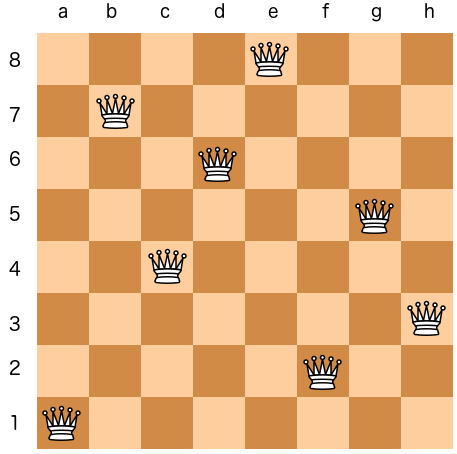
</div>

- A solution requires that no two queens share the same row, column, or diagonal.
- Use linear programming and `CVXPY` to find a solution.

In [ ]:
import cvxpy as cp
import numpy as np

N = 16

x = cp.Variable((N, N), boolean=True)
constraints = [
    cp.sum(x) == N,     
    cp.sum(x, 0) == np.ones(N),
    cp.sum(x, 1) == np.ones(N),        
]
iter = list(range(N - 1)) + list(range(N - 1, -1, -1))
constraints.extend([cp.sum([x[i, k - i] for i in range(k + 1)]) <= 1 for k in iter])
constraints.extend([cp.sum([x[i, N - 1 - k + i] for i in range(k + 1)]) <= 1 for k in range(N)])
constraints.extend([cp.sum([x[N - 1 - k + i, i] for i in range(k + 1)]) <= 1 for k in range(N - 1)])
prob = cp.Problem(cp.Maximize(0), constraints)
prob.solve()
print(x.value)

## Minimum Effort Path Problem

Using Linear Programming and `CVXPY` to solve the following minimum effort path problem:

<br/>
<div>
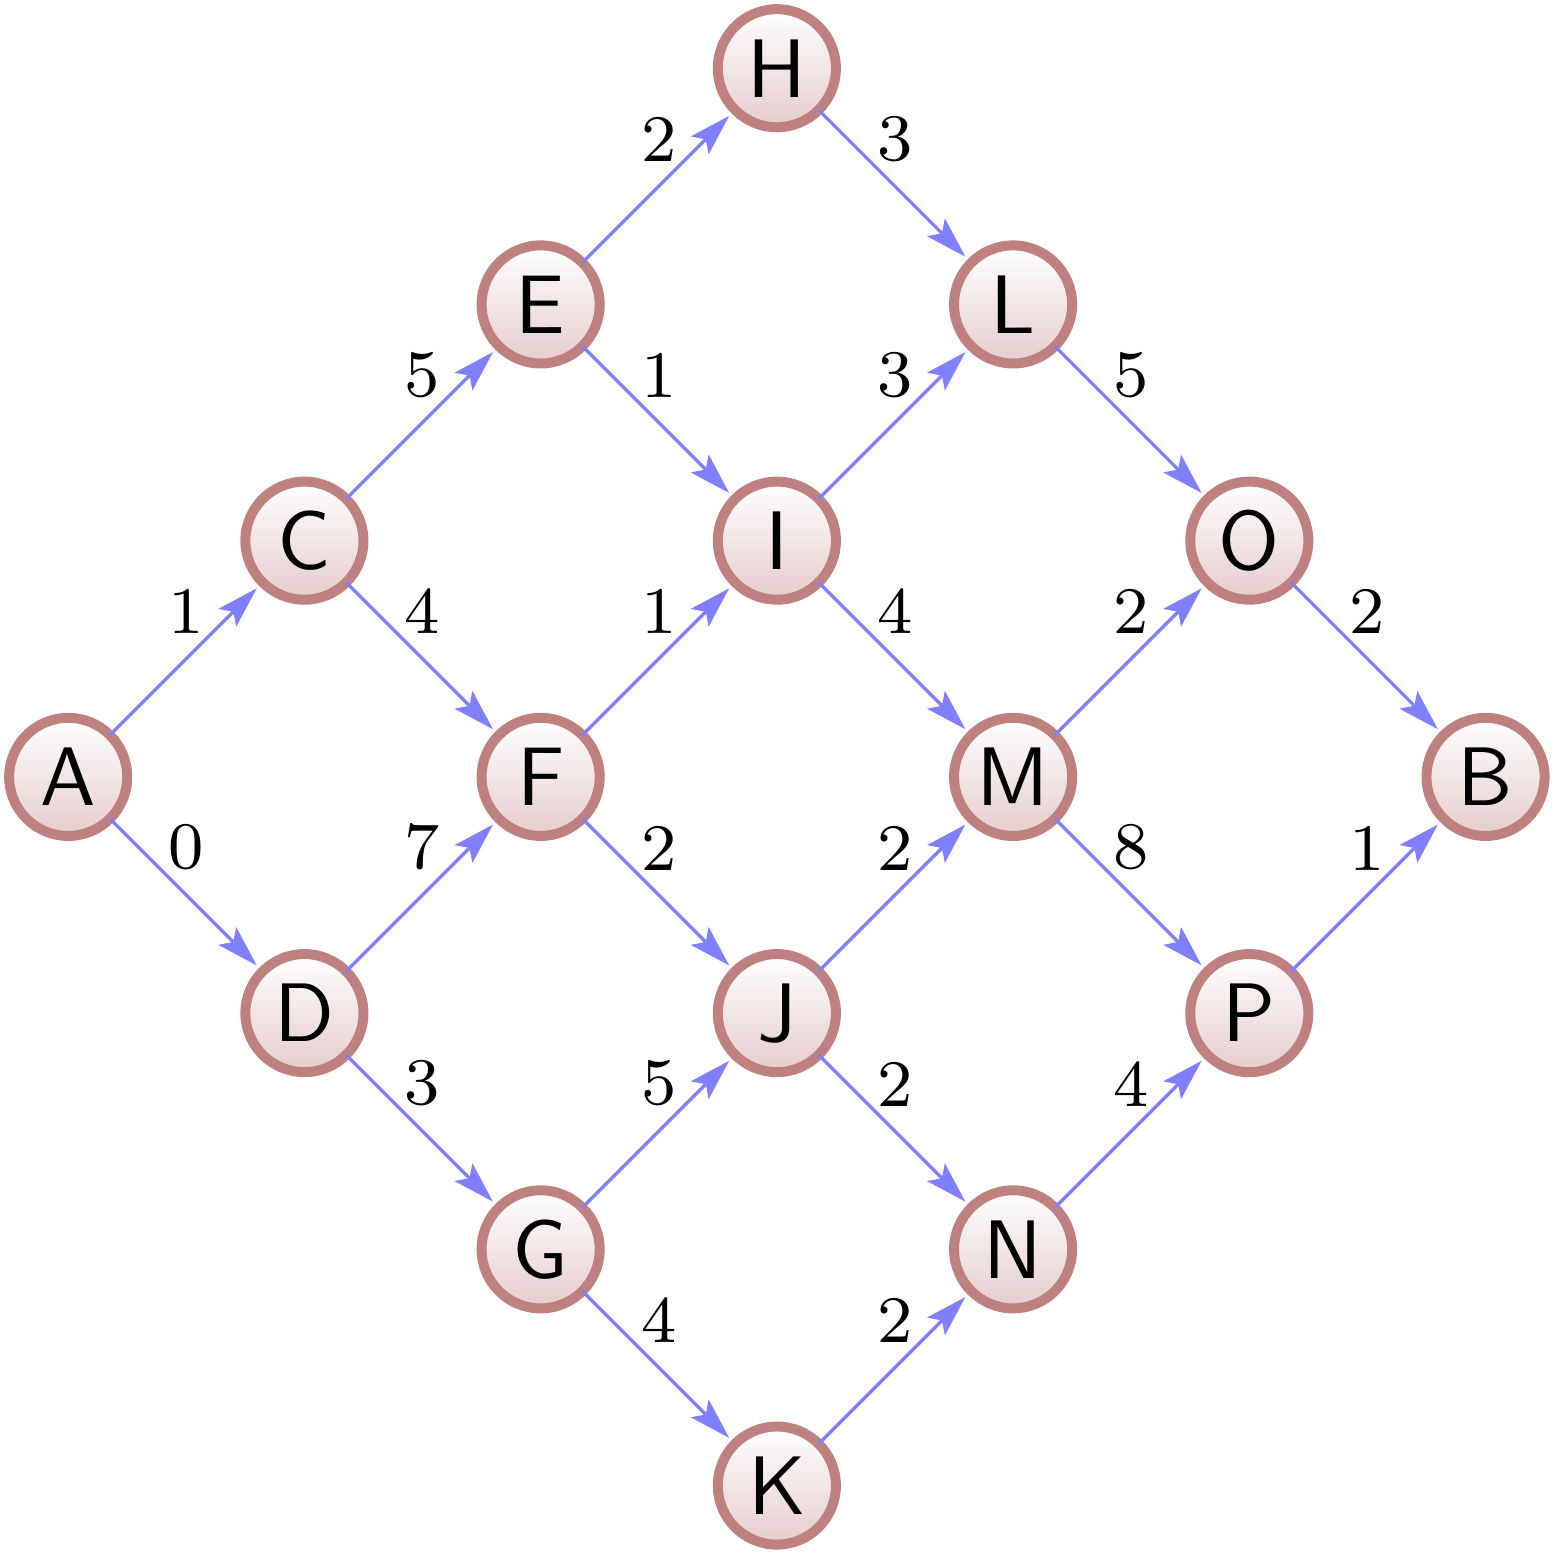
</div>
<br/>

### Solution

<br/>
<div>
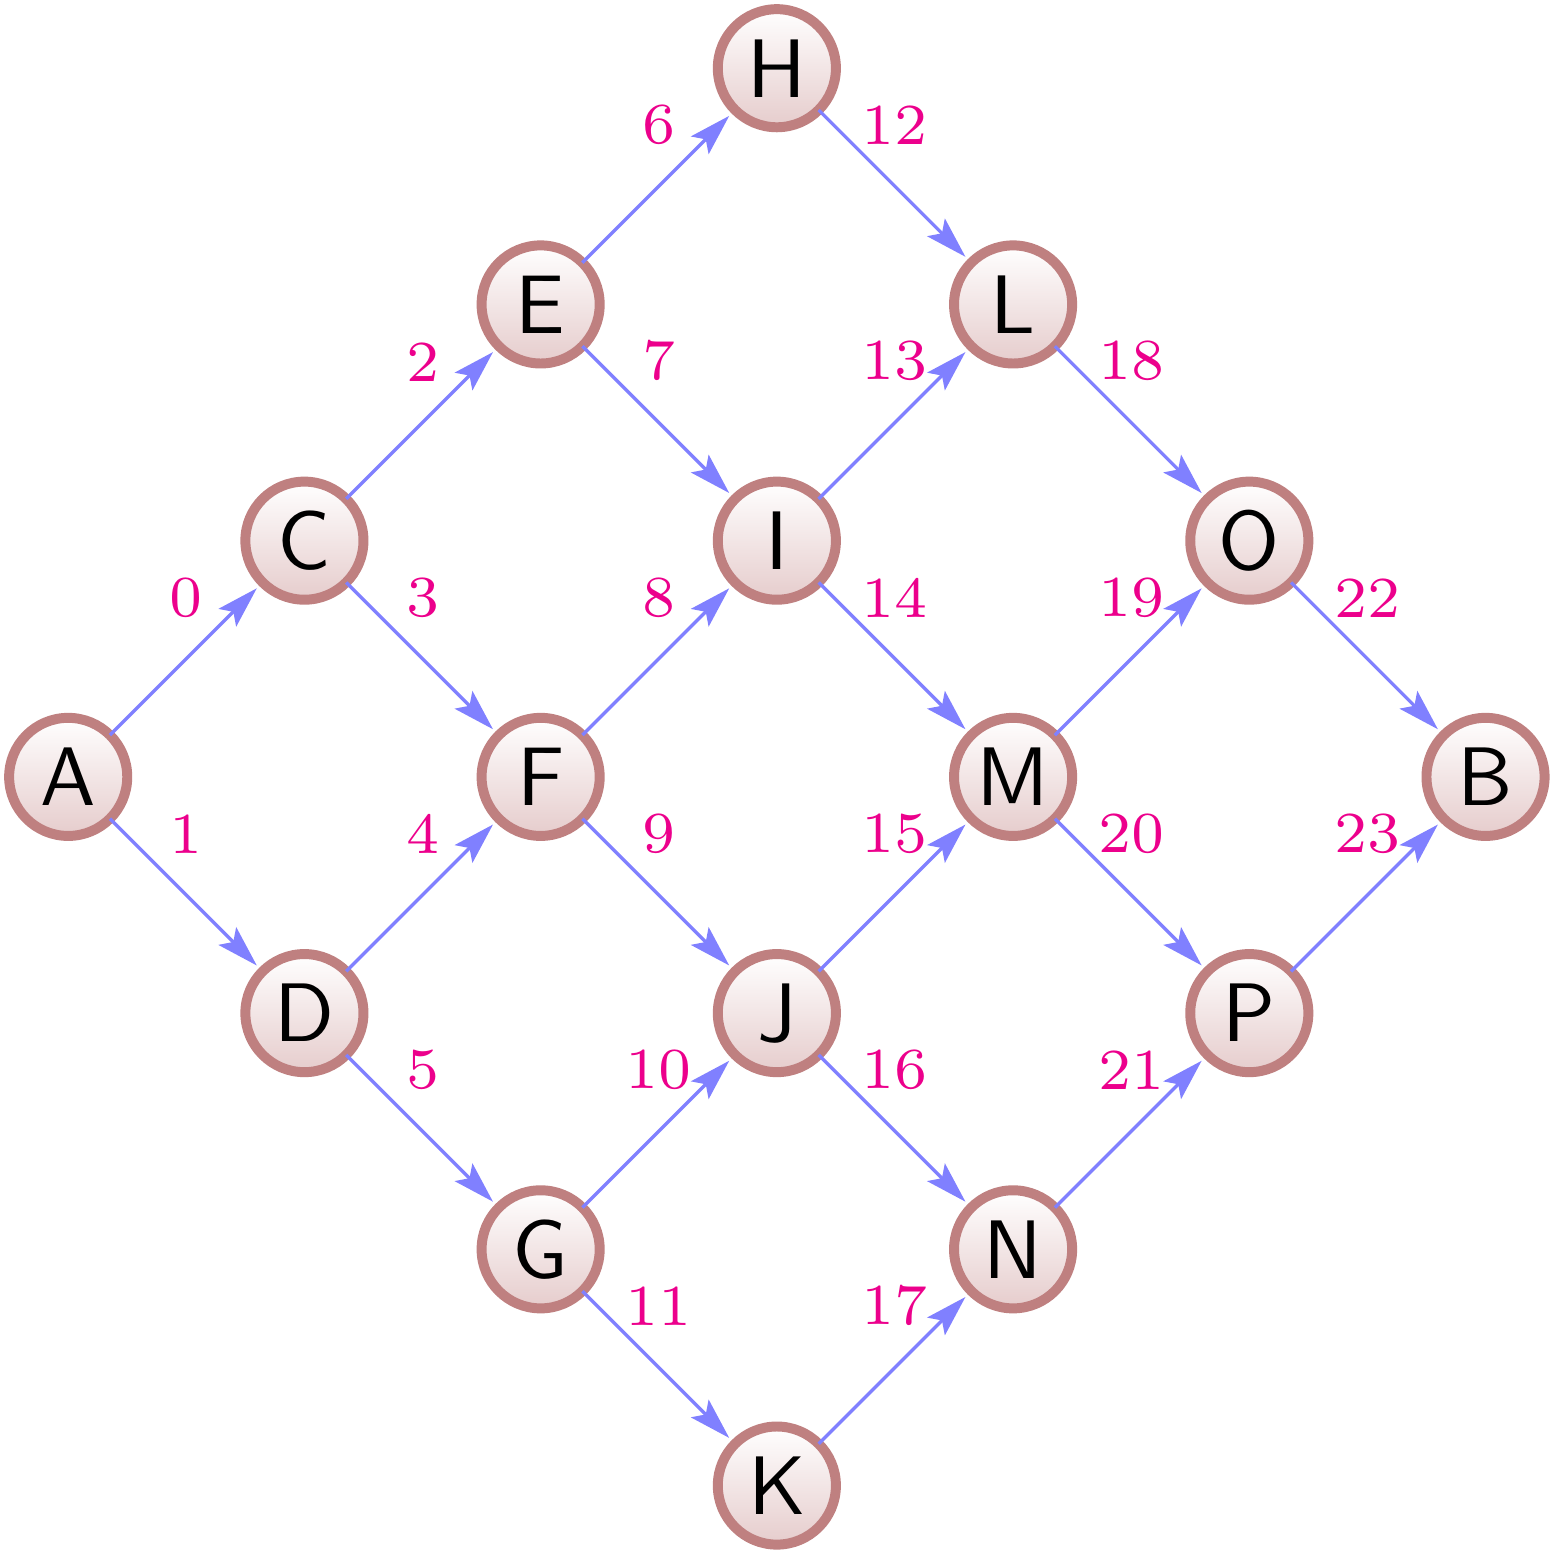
</div>
<br/>

In [ ]:
import cvxpy as cp

paths = ['AC', 'AD', 
         'CE', 'CF', 'DF', 'DG', 
         'EH', 'EI', 'FI', 'FJ', 'GJ', 'GK', 
         'HL', 'IL', 'IM', 'JM', 'JN', 'KN',
         'LO', 'MO', 'MP', 'NP',
         'OB', 'PB',]
costs = [1, 0, 5, 4, 7, 3, 2, 1, 1, 2, 5, 4, 3, 3, 4, 2, 2, 2, 5, 2, 8, 4, 2, 1]

x = cp.Variable(24, boolean=True)
constraints = [x[0] + x[1] == 1, 
               x[0] == x[2] + x[3], x[1] == x[4] + x[5],
               x[2] == x[6] + x[7], x[3] + x[4] == x[8] + x[9], x[5] == x[10] + x[11],
               x[6] == x[12], x[7] + x[8] == x[13] + x[14], x[9] + x[10] == x[15] + x[16], x[11] == x[17],
               x[12] + x[13] == x[18], x[14] + x[15] == x[19] + x[20], x[16] + x[17] == x[21],
               x[18] + x[19] == x[22], x[20] + x[21] == x[23],]
prob = cp.Problem(cp.Minimize(x @ costs), constraints)
prob.solve()
print(prob.value)
print([paths[i][0] for i, xv in enumerate(x.value) if xv == 1] + ['B'])

## Travelling Salesman Problem (TSP)

- $n$ cities identified with $1,\,2,\,\ldots,\,n$
- $\displaystyle x_{ij} = \begin{cases} 1 & \text{the path goes from } \, i\,\text{ to }\,j \\ 0 & \text{otherwise} \end{cases}$
- $u_{i}$, $i = 1,\,2,\,\ldots,\,n$: the order that $i$ is visited in the route
- $c_{ij}$, $i,\,j = 1,\,2,\,\ldots,\,n$ : the distance from city $i$ to $j$

Then the TSP can be written as the following ILP (Miller-Tucker-Zemlin (MTZ) formulation):
\begin{align*}
\text{minimize}\quad &\sum_{i=1}^n \sum_{j\ne i,\,j=1}^n c_{ij}\,x_{ij} &&  \\
\text{subject to}\quad & \sum_{i=2}^n x_{i1} = 1 \\
     & \sum_{j=2}^n x_{1j} = 1 \\
     & \sum_{i=2,\,i\ne j}^n x_{ij} = 1 && j=1,\,2,\,\ldots,\,n \\
     & \sum_{j=2,\,j\ne i}^n x_{ij} = 1 && i=1,\,2,\,\ldots,\,n \\
     & u_i \in \mathbb{N},\quad 2 \leqslant u_i \leqslant n && 2 \leqslant i \leqslant n \\
     & u_i-u_j \leqslant n\,(1-x_{ij}) - 1 && 2 \leqslant i \ne j \leqslant n  \\
     & x_{ij} \in \{0,1\}  && i,j = 1,\,2,\,\ldots,\, n     
\end{align*}

- The objective minimizes the distance of each salesman's routes
- The first two constraints ensure that there are $m$ salesmen who leave and return to the city of origin
- The following two constraints ensure that each city is reached from exactly one other city and that from each city there is an exit to exactly one other city
- The constraints of $u_i$ force that no salesman passes through the same city twice
  - Note that $x_{ij} = 1 \implies u_i - u_j = -1$

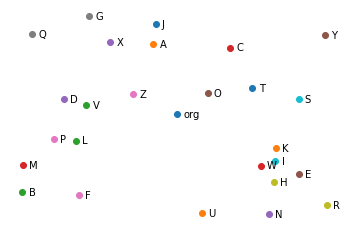

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import string

np.random.seed(100)
sites = ['org'] + [*string.ascii_uppercase]
positions = dict((s, (np.random.rand() - .5, np.random.rand() - .5)) for s in sites)
positions['org'] = (0, 0)

dist = lambda p1, p2: np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
n = len(sites)
C = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        C[i, j] = dist(positions[sites[i]], positions[sites[j]])

for s in positions:
    p = positions[s]
    plt.plot(p[0], p[1], 'o')
    plt.text(p[0] + .02, p[1], s, horizontalalignment='left', verticalalignment='center')    
plt.gca().axis('off');

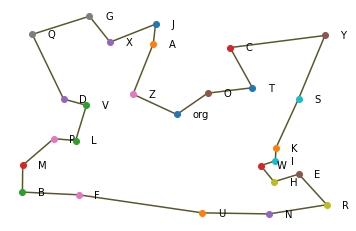

In [2]:
X = cp.Variable(C.shape, boolean=True)
u = cp.Variable(n, integer=True)
ones = np.ones((n, 1))
objective = cp.Minimize(cp.sum(cp.multiply(C, X)))

constraints = []
constraints += [X[0, :] @ ones == 1]
constraints += [X[:, 0] @ ones == 1]
constraints += [X[1:, :] @ ones == 1]
constraints += [X[:, 1:].T @ ones == 1]
constraints += [cp.diag(X) == 0]
constraints += [u[1:] >= 2]
constraints += [u[1:] <= n]
constraints += [u[0] == 1]

for i in range(1, n):
    for j in range(1, n):
        if i != j:
            constraints += [u[i] - u[j] <= n * (1 - X[i, j]) - 1]

prob = cp.Problem(objective, constraints)
prob.solve()
X_sol = np.argwhere(X.value == 1)

ruta = [0]
j = 0
a = 10e10
while a != 0:
    a = X_sol[j, 1]
    ruta.append(a)
    j = np.where(X_sol[:, 0] == a)
    j = j[0][0]
    a = j
    
p = [positions[i] for i in [sites[s] for s in ruta]]
plt.plot(*zip(*p), color=np.random.rand(3))
    
for s in positions:
    p = positions[s]
    plt.plot(p[0], p[1], 'o')
    plt.text(p[0] + .05, p[1], s, horizontalalignment='left', verticalalignment='center')
plt.gca().axis('off');

## Multiple Travelling Salesman Problem (mTSP) / Vehicle Routing Problem (VRP)

- $n$ cities identified with $1, \ldots, n$
- $\displaystyle x_{ij} = \begin{cases} 1 & \text{the path goes from } \, i \text{ to } j \\ 0 & \text{otherwise} \end{cases}$
- $m$: the number of salesmen
- $u_{i}$, $i = 1,\,2,\,\ldots,\,n$: the order that $i$ is visited in the route
- $c_{ij}$, $i,\,j = 1,\,2,\,\ldots,\,n$ : the distance from city $i$ to $j$

Then the mTSP can be written as the following ILP (Miller-Tucker-Zemlin (MTZ) formulation):
\begin{align*}
\text{minimize}\quad &\sum_{i=1}^n \sum_{j\ne i,\,j=1}^n c_{ij}\,x_{ij} &&  \\
\text{subject to}\quad & \sum_{i=2}^n x_{i1} = m \\
  & \sum_{j=2}^n x_{1j} = m \\
  & \sum_{i=2,\,i\ne j}^n x_{ij} = 1 && j=1,\,2,\,\ldots,\,n \\
  & \sum_{j=2,\,j\ne i}^n x_{ij} = 1 && i=1,\,2,\,\ldots,\,n \\
  & u_i \in \mathbb{N},\quad 2 \leqslant u_i \leqslant n && 2 \leqslant i \leqslant n \\
  & u_i - u_j \leqslant n\,(1-x_{ij}) - 1 && 2 \leqslant i \ne j \leqslant n  \\
  & x_{ij} \in \{0,1\}  && i,j = 1,\,2,\,\ldots,\, n     
\end{align*}

- The objective minimizes the distance of each salesman's routes
- The first two constraints ensure that there are $m$ salesmen who leave and return to the city of origin
- The following two constraints ensure that each city is reached from exactly one other city and that from each city there is an exit to exactly one other city
- The constraints of $u_i$ force that no salesman passes through the same city twice
  - Note that $x_{ij} = 1 \implies u_i - u_j = -1$

The path of Salesman_1 is:

0 => 1 => 10 => 24 => 7 => 17 => 4 => 22 => 0

The path of Salesman_2 is:

0 => 3 => 25 => 19 => 0

The path of Salesman_3 is:

0 => 12 => 16 => 13 => 2 => 6 => 21 => 14 => 18 => 5 => 8 => 23 => 9 => 11 => 0

The path of Salesman_4 is:

0 => 15 => 0

The path of Salesman_5 is:

0 => 20 => 0

The path of Salesman_6 is:

0 => 26 => 0



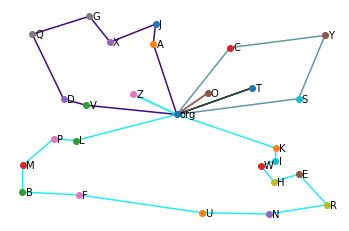

In [3]:
X = cp.Variable(C.shape, boolean=True)
u = cp.Variable(n, integer=True)
m = 6
ones = np.ones((n, 1))

objective = cp.Minimize(cp.sum(cp.multiply(C, X)))

constraints = []
constraints += [X[0, :] @ ones == m]
constraints += [X[:, 0] @ ones == m]
constraints += [X[1:, :] @ ones == 1]
constraints += [X[:, 1:].T @ ones == 1]
constraints += [cp.diag(X) == 0]
constraints += [u[1:] >= 2]
constraints += [u[1:] <= n]
constraints += [u[0] == 1]

for i in range(1, n):
    for j in range(1, n):
        if i != j:
            constraints += [u[i] - u[j] <= (n - 1) * (1 - X[i, j]) - 1]

# Solving the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Transforming the solution to paths
X_sol = np.argwhere(X.value == 1)

ruta = {}
for i in range(0, m):
    ruta['Salesman_' + str(i + 1)] = [0]
    j = i
    a = 10e10
    while a != 0:
        a = X_sol[j, 1]
        ruta['Salesman_' + str(i + 1)].append(a)
        j = np.where(X_sol[:, 0] == a)
        j = j[0][0]
        a = j

# showing the paths
for i in ruta.keys():
    print('The path of ' + i + ' is:\n')
    print(' => '.join(map(str, ruta[i])))
    print('')

colors = [np.random.rand(3) for i in range(len(ruta))]
for k, c in zip(ruta, colors):
    p = [positions[i] for i in [sites[s] for s in ruta[k]]]
    plt.plot(*zip(*p), color=c)
    
for s in positions:
    p = positions[s]
    plt.plot(p[0], p[1], 'o')
    plt.text(p[0] + .01, p[1], s, horizontalalignment='left', verticalalignment='center')
plt.gca().axis('off');